# Read Data

In [1]:
# As we mentioned decison_function sign would determine the predict class for a case
# What if we need to predict more than 2 classes
# Natively SVM could only create one split hyperplane and split the data into 2 groups
# Therefore, in multiple(>=3) classification scenario, sklearn SVM model would create n(n-1)/2 split hyperplane to classify
# the combination of every 2 groups and then use votes to determine the final prediction
# Let's have a look

In [6]:
# Read data
import pandas as pd
df=pd.read_csv('iris.csv')

In [7]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [8]:
# Data Processing
import matplotlib.pyplot as plt
df_feature=df[['sepal.length','petal.length', 'variety']]

setosa_x=df[df['variety']=='Setosa']['sepal.length']
versicolor_x=df_feature[df_feature['variety']=='Versicolor']['sepal.length']
virginica_x=df[df['variety']=='Virginica']['sepal.length']

setosa_y=df_feature[df_feature['variety']=='Setosa']['petal.length']
versicolor_y=df_feature[df_feature['variety']=='Versicolor']['petal.length']
virginica_y=df_feature[df_feature['variety']=='Virginica']['petal.length']

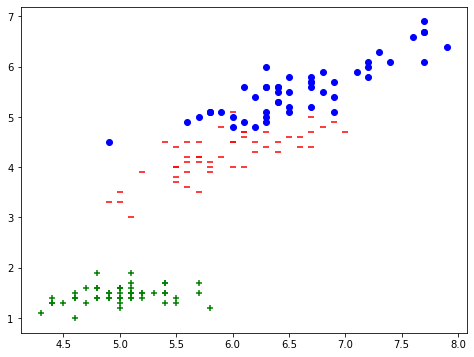

In [9]:
# Plot the data
plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.scatter(virginica_x,virginica_y,marker='o',color='blue')
plt.show()

# Feature Engineering

In [13]:
# normalize the data
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X=np.array(df_feature[['sepal.length','petal.length']])
target=df_feature['variety']
Y=[]
for val in target:
    if val=='Setosa':
        Y.append(0)
    if val=='Versicolor':
        Y.append(1)
    if val=='Virginica':
        Y.append(2)
X_normalized=MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X_normalized)

In [14]:
X,Y=shuffle(X,Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

# Fit Model

In [16]:
from sklearn import svm
# This time, class not not really linear split, let's use radinal kernel
clf=svm.SVC(kernel='rbf', gamma=2)
# Train the model using the training sets
clf.fit(x_train, y_train)

SVC(gamma=2)

In [17]:
y_pred=clf.predict(x_test)

In [18]:
y_pred

array([2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0])

In [19]:
y_test

[2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0]

# Plot the Result

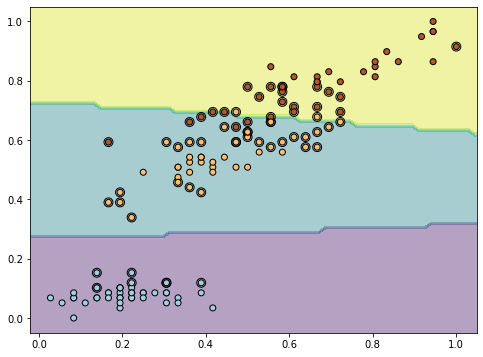

In [20]:
# Plot the result
plt.figure(figsize=(8,6))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(np.array(x_train)[:, 0], np.array(x_train)[:, 1], c=y_train, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
x_min, x_max = np.array(x_train)[:, 0].min() - 1, np.array(x_train)[:, 0].max() + 1
y_min, y_max = np.array(x_train)[:, 1].min() - 1, np.array(x_train)[:, 1].max() + 1

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.contourf(XX, YY, Z, alpha=0.4)
plt.show()

# Decision Function

In [22]:
# if we call decision function, it returns an array with 3 numbers for each observation
# how to interpret them?
clf.decision_function(x_test)

array([[-0.2426054 ,  1.13108188,  2.22317235],
       [ 2.23515411,  1.06018666, -0.24113762],
       [-0.24570333,  1.20902313,  2.17627903],
       [-0.24615837,  1.13320452,  2.22778577],
       [ 2.23181953,  1.1049705 , -0.24428513],
       [-0.23702889,  2.21387329,  1.13384151],
       [ 2.22563992,  1.16258503, -0.25097588],
       [-0.24570333,  1.20902313,  2.17627903],
       [ 2.23181953,  1.1049705 , -0.24428513],
       [-0.24238816,  1.16683699,  2.20816902],
       [-0.24126237,  1.19127537,  2.18674461],
       [-0.24285495,  2.20918896,  1.16658958],
       [-0.23343706,  2.2156751 ,  1.11166234],
       [-0.21983672,  2.18556514,  1.1350575 ],
       [ 2.23491604,  1.1546832 , -0.25495328]])

In [23]:
clf.predict(x_test)

array([2, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0])

In [ ]:
# As mentioned before, SVC and NuSVC implement the “one-versus-one” approach for multi-class classification. 
# In total, n_classes * (n_classes - 1) / 2 classifiers are constructed and each one trains data from two classes.
# take the first case as an example, the decision function for class combination [AB, AC, BC]
# For AB, it is a negative number, so we predict class B
# For AC, it is a positive number, then we predict class A
# For BC, it is a positive number, then we predict class B
# Based on the votes [B,A,B], the first test case would be predict as class, which returns 2

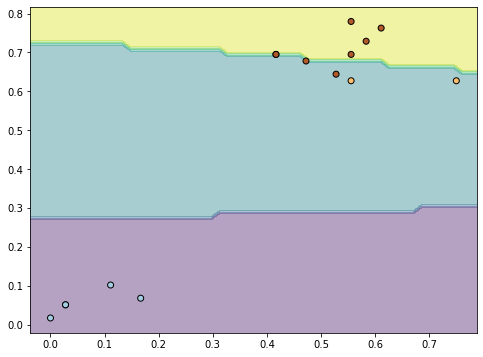

In [25]:
# Let's plot the test case to have a look
# Then we could see with the split boundaries, we predict a few wrong. 
# Class 2 and Class 3 are overlap and very hard to differentiate, 
# In this case, if we want to increase model performance, need to add more features that could differetiate these 2 calsses better
plt.figure(figsize=(8,6))
plt.scatter(np.array(x_test)[:, 0], np.array(x_test)[:, 1], c=y_test, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

plt.axis('tight')
x_min, x_max = np.array(x_train)[:, 0].min() - 1, np.array(x_train)[:, 0].max() + 1
y_min, y_max = np.array(x_train)[:, 1].min() - 1, np.array(x_train)[:, 1].max() + 1

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.contourf(XX, YY, Z, alpha=0.4)
plt.show()